## Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from skimage.feature import hog
from skimage import exposure

## Load the Fall Detection Dataset

In [3]:
data = pd.read_csv('Train.csv')

# Display the first few rows of the dataset

In [4]:
print(data.head())

   Unnamed: 0    acc_max   gyro_max  acc_kurtosis  gyro_kurtosis label  \
0         661  26.039919   7.309797     20.378162       2.782476   SDL   
1         122  25.864500   6.511954     14.187190       5.324864   FOL   
2         113  27.524501  12.944099     31.855926      22.891186   FOL   
3          14  30.647705  11.694868     23.608764       9.287735   FOL   
4         529  26.373917  11.168424     14.318453      15.983202   FKL   

     lin_max  acc_skewness  gyro_skewness  post_gyro_max  post_lin_max  fall  
0  11.131080      3.891361       1.592927       7.086618     10.790400     1  
1   7.945561      3.022175       2.376939       6.325522      7.719352     1  
2  14.454818      4.849024       4.283890      12.888111     14.368784     1  
3  15.228303      3.921537       2.794609      11.549971     14.944151     1  
4  10.007396      3.087975       3.363557      11.057636      9.753058     1  


# Summary statistics


In [5]:
print(data.describe())

        Unnamed: 0      acc_max     gyro_max  acc_kurtosis  gyro_kurtosis  \
count  1428.000000  1428.000000  1428.000000   1428.000000    1428.000000   
mean    894.572129    21.753410     5.051467      9.964558       3.906186   
std     515.240679     5.479771     2.965499     11.987739       5.495657   
min       0.000000     9.787964     0.026257     -1.743347      -1.532044   
25%     451.750000    18.822419     3.159428      0.468756       0.182250   
50%     891.500000    22.866648     4.558629      8.575117       2.028413   
75%    1343.250000    25.863247     6.484719     15.475659       5.456435   
max    1783.000000    32.885551    17.288546    231.134385      32.301675   

           lin_max  acc_skewness  gyro_skewness  post_gyro_max  post_lin_max  \
count  1428.000000   1428.000000    1428.000000    1428.000000   1428.000000   
mean      7.934861      1.711623       1.626049       3.232624      5.190129   
std       4.249702      1.530360       0.999605       3.432610    

# Distribution of labels


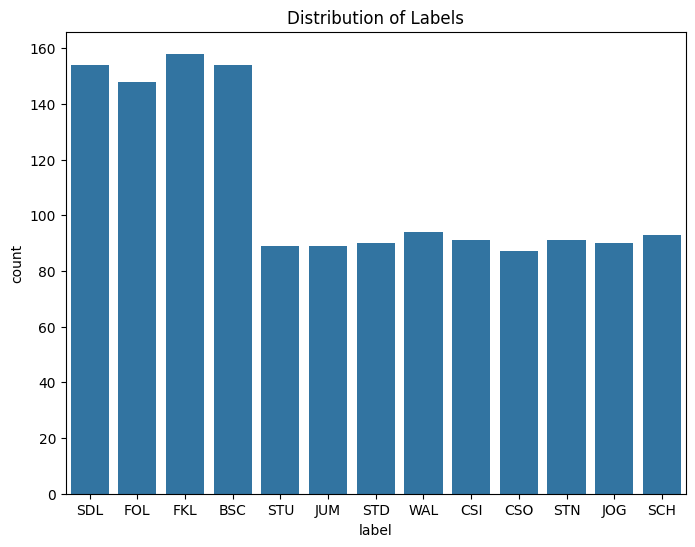

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Labels')
plt.show()

# Pairplot to visualize relationships between features

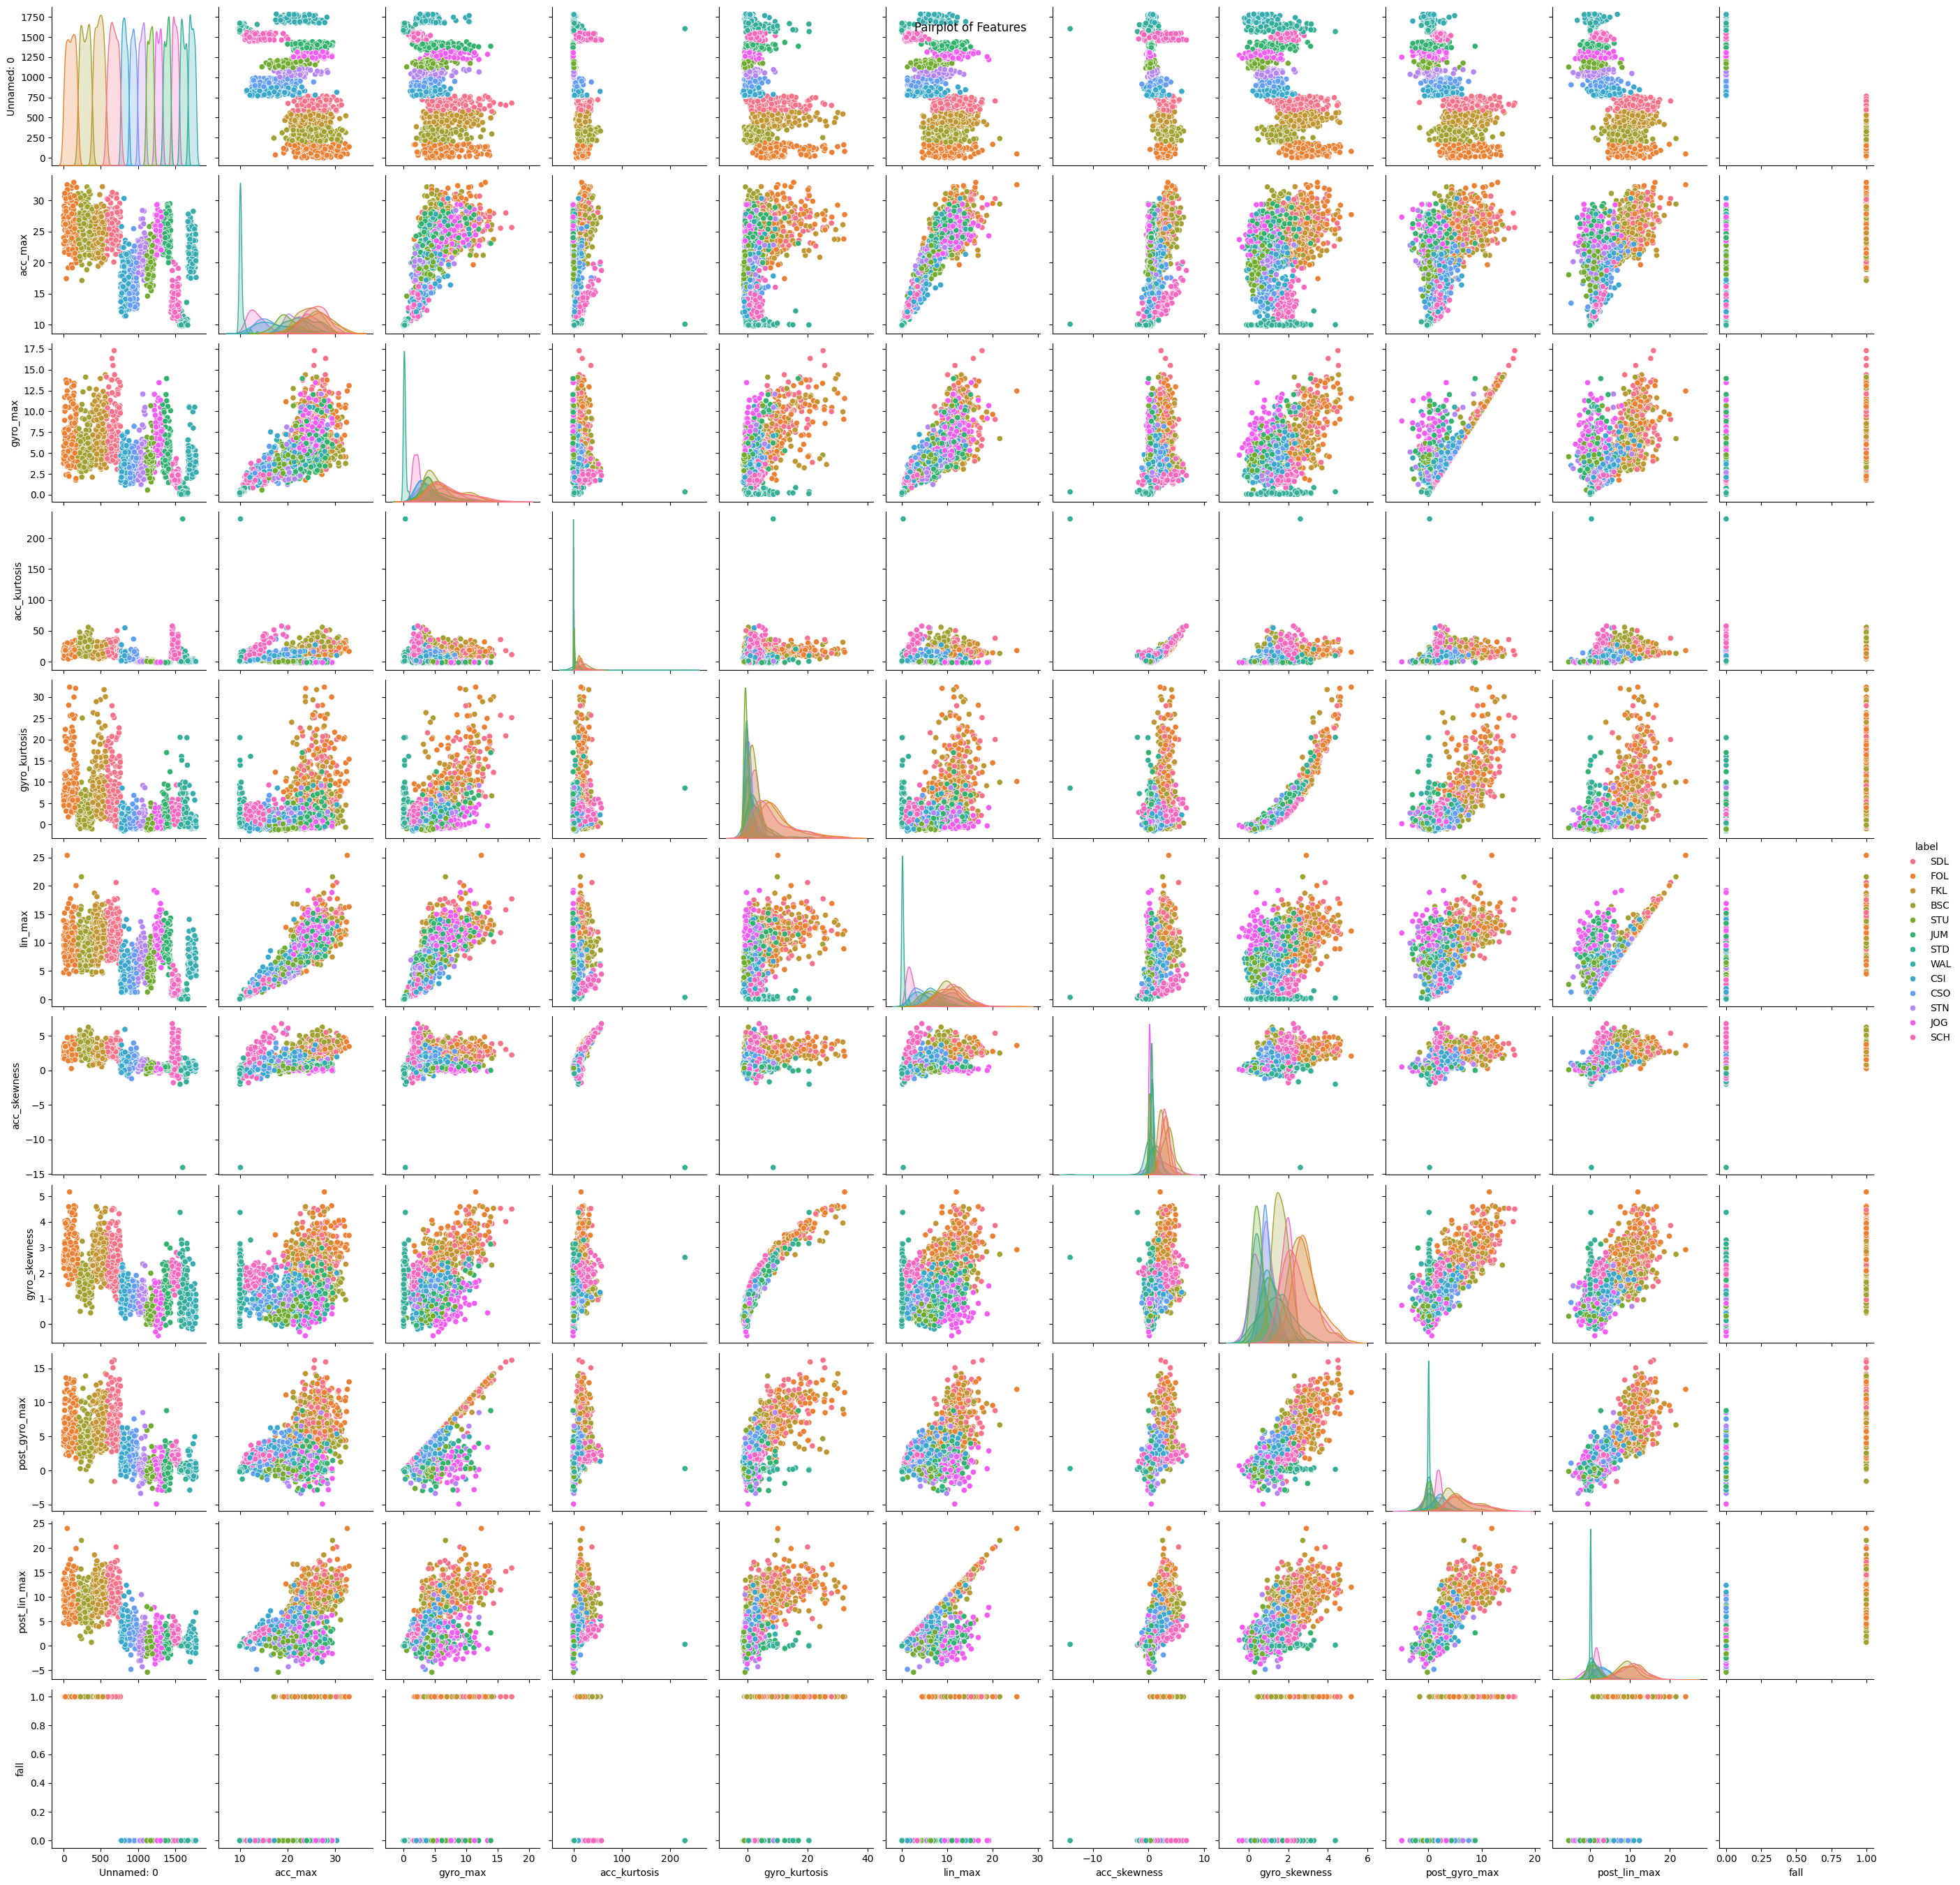

In [7]:
sns.pairplot(data, hue='label')
plt.suptitle('Pairplot of Features')
plt.show()

# Boxplot to identify outliers


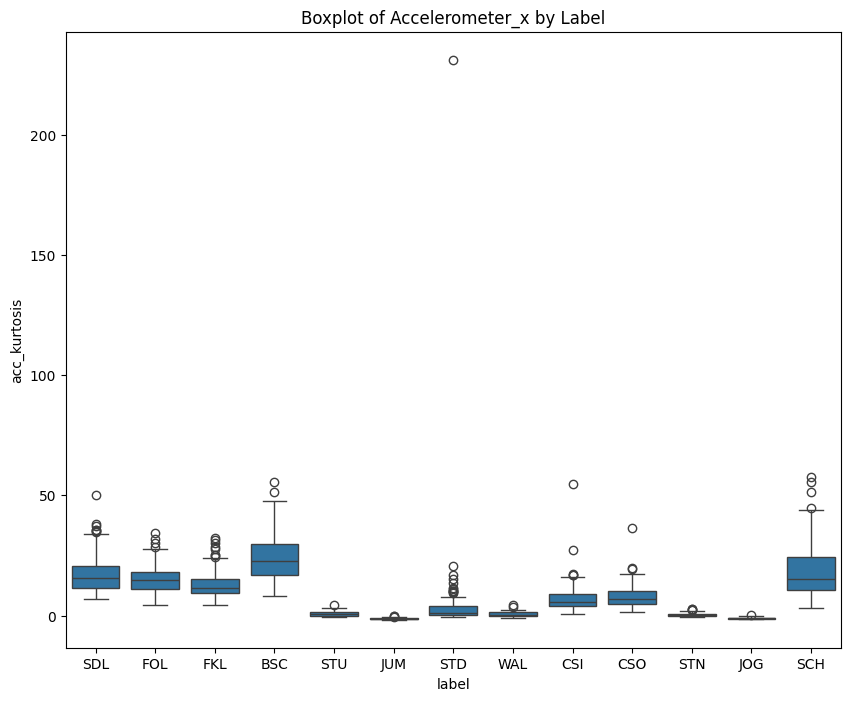

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='label', y='acc_kurtosis', data=data)
plt.title('Boxplot of Accelerometer_x by Label')
plt.show()

# Correlation heatmap

<ipython-input-10-82c991aabc58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


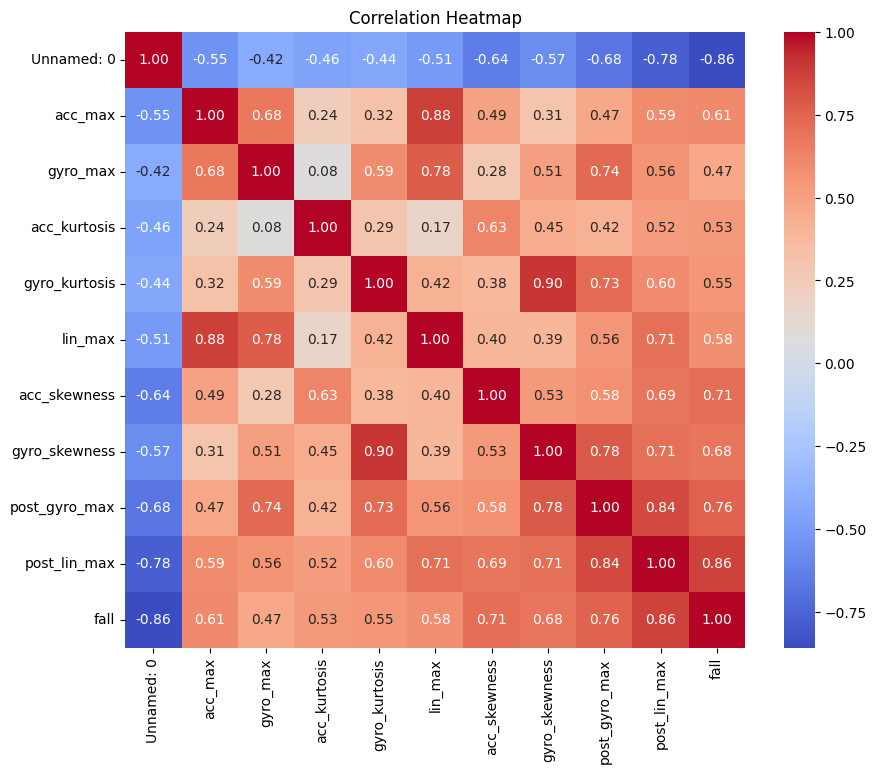

In [10]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Assume 'features' contains accelerometer and gyroscope measurements


In [12]:
features = data[['acc_kurtosis', 'acc_skewness', 'gyro_kurtosis', 'gyro_skewness']]

# Assume 'labels' contain binary labels (1 for fall, 0 for non-fall)


In [13]:
labels = data['label']

# Split the dataset into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Extract HOG features from accelerometer and gyroscope measurements


In [15]:
def extract_hog_features(data):
    features = []
    for index, row in data.iterrows():
        image = np.array(row).reshape((2, 2))  # Reshape the data for HOG processing
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(1, 1), cells_per_block=(1, 1), visualize=True)
        features.append(fd)
    return np.array(features)

In [16]:
X_train_hog = extract_hog_features(X_train)
X_test_hog = extract_hog_features(X_test)

# Initialize classifiers with different parameters

In [17]:
classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('SVM Classifier', SVC(kernel='linear', random_state=42)),
    ('KNN Classifier', KNeighborsClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42))
]

# Train and evaluate each classifier

In [18]:
for name, classifier in classifiers:
    # Train the model
    if 'AdaBoost' in name:
        classifier.fit(X_train_hog, y_train)
    elif 'KNN' in name:
        classifier.fit(X_train_hog, y_train)
    else:
        classifier.fit(X_train_hog, y_train)

    # Evaluate the model
    y_pred = classifier.predict(X_test_hog)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Display results
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print(f"Classification Report:\n{classification_rep}")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


Decision Tree Results:
Accuracy: 0.06293706293706294
Confusion Matrix:
[[ 0  0  0  0 31  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

         BSC       0.00      0.00      0.00        31
         CSI       0.00      0.00      0.00        19
         CSO       0.00      0.00      0.00        22
         FKL       0.00      0.00      0.00        33
         FOL       0.06      1.00      0.12        18
         JOG       0.00      0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


SVM Classifier Results:
Accuracy: 0.06293706293706294
Confusion Matrix:
[[ 0  0  0  0 31  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 21  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

         BSC       0.00      0.00      0.00        31
         CSI       0.00      0.00      0.00        19
         CSO       0.00      0.00      0.00        22
         FKL       0.00      0.00      0.00        33
         FOL       0.06      1.00      0.12        18
         JOG       0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Compare models based on accuracy


In [19]:
accuracies = []
for name, classifier in classifiers:
    if 'AdaBoost' in name:
        y_pred = classifier.predict(X_test_hog)
    elif 'KNN' in name:
        y_pred = classifier.predict(X_test_hog)
    else:
        y_pred = classifier.predict(X_test_hog)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Display model comparison

In [20]:
model_comparison = pd.DataFrame({'Model': [name[0] for name in classifiers], 'Accuracy': accuracies})
print("\nModel Comparison:")
print(model_comparison)


Model Comparison:
                 Model  Accuracy
0        Decision Tree  0.062937
1  Logistic Regression  0.062937
2       SVM Classifier  0.062937
3       KNN Classifier  0.062937
4  AdaBoost Classifier  0.062937
